Loaded model from disk
Found 7178 images belonging to 7 classes.


C:\Users\deepa\AppData\Local\Temp\ipykernel_2996\3860957802.py:38: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = emotion_model.predict_generator(test_generator)


-----------------------------------------------------------------
[[116   0  48 297 262 154  81]
 [ 10   0   8  39  28  10  16]
 [105   0  85 322 261 169  82]
 [198   1 115 581 447 274 158]
 [133   0  89 388 324 185 114]
 [137   2  85 387 318 188 130]
 [ 99   0  56 243 210 143  80]]

Accuracy: 0.19



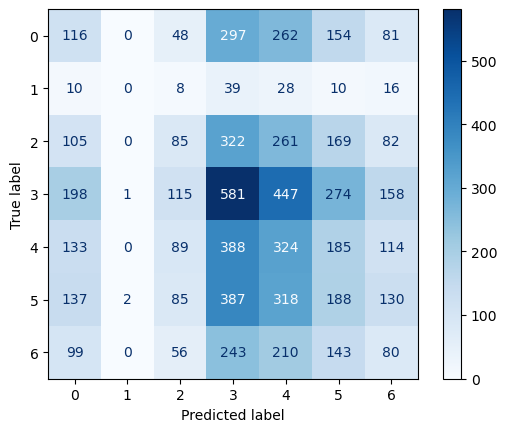

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.15      0.12      0.13       958
           1       0.00      0.00      0.00       111
           2       0.17      0.08      0.11      1024
           3       0.26      0.33      0.29      1774
           4       0.18      0.26      0.21      1233
           5       0.17      0.15      0.16      1247
           6       0.12      0.10      0.11       831

    accuracy                           0.19      7178
   macro avg       0.15      0.15      0.14      7178
weighted avg       0.18      0.19      0.18      7178



In [1]:
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score


emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# do prediction on test data
predictions = emotion_model.predict_generator(test_generator)

# see predictions
# for result in predictions:
#     max_index = int(np.argmax(result))
#     print(emotion_dict[max_index])

print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(test_generator.classes, predictions.argmax(axis=1))))
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))

In [9]:
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
h = np.array([113, 9, 131, 251, 172, 171, 111, 14, 1, 17, 32, 19, 18, 10, 154, 9, 130, 258, 176, 176, 121, 223, 22, 232, 443, 318, 329, 207, 162, 14, 139, 311, 239, 230, 138, 173, 10, 140, 321, 211, 248, 144, 110, 14, 98, 227, 145, 140, 97])
y = np.array([113, 14, 154, 223, 162, 173, 110, 9, 1, 9, 22, 14, 10, 14, 131, 17, 130, 232, 139, 140, 98, 251, 32, 258, 443, 311, 321, 227, 172, 19, 176, 318, 239, 211, 145, 171, 18, 176, 329, 230, 248, 140, 111, 10, 121, 207, 138, 144, 97])
np.column_stack((h,y,7))


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 49 and the array at index 2 has size 1

In [5]:
from sklearn.metrics import confusion_matrix
y_actu = [2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0]
y_pred = [2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2]
confusion_matrix(y_actu, y_pred)

array([[4, 1, 2],
       [3, 0, 2],
       [1, 2, 1]], dtype=int64)